<a href="https://colab.research.google.com/github/rick1270/DS-Sprint-02-Storytelling-With-Data/blob/master/Clayton_Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing a bunch of stuff so I don't have to keep doing that
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [39]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(20)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
3276,55,1250.0,2,200,1.4,3,0,1999,0
6948,76,2800.0,3,167,1.5,3,1,2002,0
6675,22,1600.0,2,2,1.0,3,1,1992,0
6156,59,3400.0,5,260,2.2,0,0,2005,0
3890,67,4700.0,1,145,1.2,1,1,2004,0
3572,76,3850.0,3,135,1.6,3,1,2007,0
4500,67,14800.0,3,12,1.6,3,1,2012,0
4724,76,2100.0,3,200,1.5,1,1,2004,0
7540,76,1050.0,3,29,1.5,3,1,1996,2
5249,5,2666.0,3,360,2.5,0,0,1996,2


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
#make 2 sets
X = df.loc[:, ['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year', 'drive']]
y = df.loc[:, ['price']]




## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
#Break into multiple groups
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)


## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [18]:

#Shape data and compare against original
print(X.shape, "\n")

print(X_train.shape)
print(Y_train.shape)
print(y.shape)
print(X.shape)
model = LinearRegression()
model.fit(X, y)


(8495, 8) 

(4247, 8)
(4247, 1)
(8495, 1)
(8495, 8)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [19]:
#Predictions
beta_0 = model.intercept_
beta_i = model.coef_[0]
print('Slope Coefficients: ', beta_i)
print('\nIntercept Value: ', model.coef_[0])

Slope Coefficients:  [ -30.21869199 -282.69836113  -40.96652387  283.86754057 -280.2874563
 4491.23880915 1210.36164056 8837.23538017]

Intercept Value:  [ -30.21869199 -282.69836113  -40.96652387  283.86754057 -280.2874563
 4491.23880915 1210.36164056 8837.23538017]


## 1.5 Use the test data to make predictions

In [0]:
#Results
y_test_predict = model.predict(X_test)

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [21]:
#Is it accurate and is it precise
MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE os {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 506641937.9524365
RMSE os 22508.708047163356
R^2 is 0.2669360433358251


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

year coefficient = 1157.35795184

$y_i = \beta_0 + \beta_1year + \epsilon$


## 1.8 How should we interpret the Root-Mean-Square Error?

A easure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed. The RMSD represents the square root of the second sample moment of the differences between predicted values and observed values or the quadratic mean of these differences. These deviations are called residuals when the calculations are performed over the data sample that was used for estimation and are called errors (or prediction errors) when computed out-of-sample. The RMSD serves to aggregate the magnitudes of the errors in predictions for various times into a single measure of predictive power. RMSD is a measure of accuracy, to compare forecasting errors of different models for a particular dataset and not between datasets, as it is scale-dependent.

## 1.9 How should we interpret the $R^2$?



27%  of the price is explained by the other varibles


# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [22]:
#smoothing out the price
df['log_price'] = np.log(df['price'])
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,log_price
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595
1,50,20500.0,9,173,1.8,1,1,2011,2,9.928180
2,50,35000.0,4,135,5.5,9,1,2008,2,10.463103
3,50,17800.0,25,162,1.8,0,1,2012,0,9.786954
4,55,16600.0,0,83,2.0,9,1,2013,1,9.717158


## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

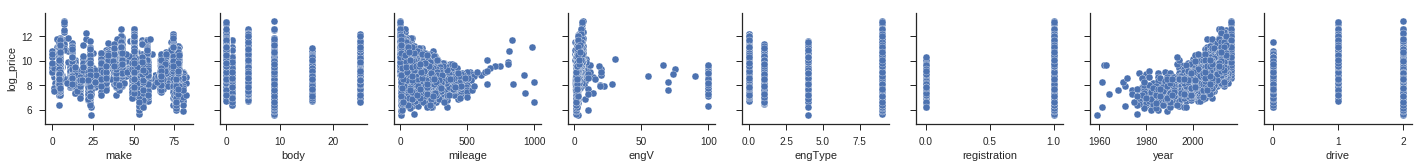

In [23]:
sns.set(style="ticks", color_codes=True)
x_columns = 'make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year', 'drive'
sns.pairplot(data=df, y_vars=['log_price'], x_vars=x_columns)

## 2.3 If appropriate, create any polynomial features. 

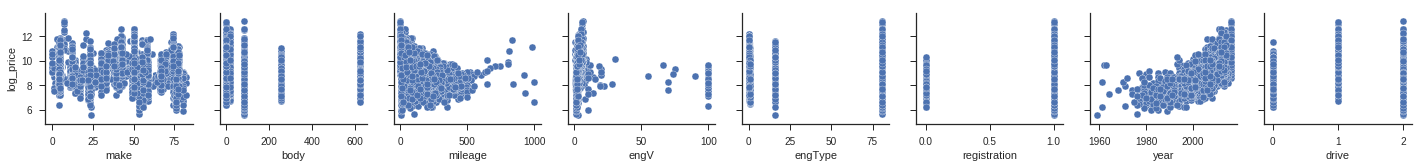

In [24]:
df['body'], df['engType'] = df['body']**2, df['engType']**2
sns.set(style="ticks", color_codes=True)
x_columns = 'make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year', 'drive'
sns.pairplot(data=df, y_vars=['log_price'], x_vars=x_columns)

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [25]:
# Separate dependent and independent variables
y = df.loc[:, ['log_price']].values
X = df.loc[:, ['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year', 'drive']].values
# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))




RMSE is 0.5847100473711232
R^2 is 0.6368539447177903


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

$logprice_i = \beta_0  + \beta_2year^{2}_i + \epsilon_i$

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient Descent is used while training a machine learning model. It is an optimization algorithm, based on a convex function, that tweaks it's parameters iteratively to minimize a given function to its local minimum.  Gradient descent is best used when the parameters cannot be calculated analytically (e.g. using linear algebra) and must be searched for by an optimization algorithm.





## 3.2 What is the "Learning Rate" and what is its function?

new_weight = existing_weight — learning_rate * gradient

Learning rate is a hyper-parameter that controls how much we are adjusting the weights of our network with respect the loss gradient. The lower the value, the slower we travel along the downward slope. While this might be a good idea (using a low learning rate) in terms of making sure that we do not miss any local minima, it could also mean that we’ll be taking a long time to converge — especially if we get stuck on a plateau region.

![Learning Rate Images](https://cdn-images-1.medium.com/max/800/0*uIa_Dz3czXO5iWyI.)


Furthermore, the learning rate affects how quickly our model can converge to a local minima (aka arrive at the best accuracy). Thus getting it right from the get go would mean lesser time for us to train the model.

Additionally, less training time, lesser money spent on GPU cloud compute. 


# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [26]:
#add ones
X2 = sm.add_constant(X)

model = sm.OLS(y, X2).fit(cov_type='HC3')
predictions = model.predict(X2) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     1425.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:07:15   Log-Likelihood:                -7376.5
No. Observations:                8495   AIC:                         1.477e+04
Df Residuals:                    8486   BIC:                         1.483e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -189.5278      3.549    -53.410      0.0

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor



vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


#Making everything look nice and readable

print('make          ', vif[0])
print('body          ', vif[1])
print('mileage       ', vif[2])
print('engV          ', vif[3])
print('engType       ', vif[4])
print('registration  ', vif[5])
print('year          ', vif[6])
print('drive         ', vif[7], '\n\n')
print('Yep.... we got ourselves some multicollinearity problems!')
print('Better get rid of either "registration" or "year" or maybe even both')





make           4.851000106851387
body           1.6557705896291648
mileage        3.5628426645884583
engV           1.2380353200468173
engType        2.2191165262748975
registration   18.445489283194764
year           28.138793253115825
drive          1.7223873419393354 


Yep.... we got ourselves some multicollinearity problems!
Better get rid of either "registration" or "year" or maybe even both
